# Calculate Homography Transformation Matrix Error

In [38]:
from drivenetbench.view_transformer import ViewTransformer
from drivenetbench.utilities.utils import check_if_notebook
import numpy as np
import supervision as sv
from PIL import Image
import matplotlib.pyplot as plt

In [39]:
ref_vertex_annoatator = sv.VertexAnnotator(color=sv.Color.BLUE, radius=10)
transformed_vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.RED, radius=10
)

# New Track

In [40]:
original_source_keypoints = np.load(
    "/home/ali/bimi/DriveNetBench/keypoints/new_track/keypoints_from_camera.npy"
)
target_keypoints = np.load(
    "/home/ali/bimi/DriveNetBench/keypoints/new_track/keypoints_from_diagram.npy"
)
source_keypoints = original_source_keypoints[np.newaxis, ...]
target_keypoints = target_keypoints[np.newaxis, ...]

source_keypoints = sv.KeyPoints(source_keypoints)
target_keypoints = sv.KeyPoints(target_keypoints)

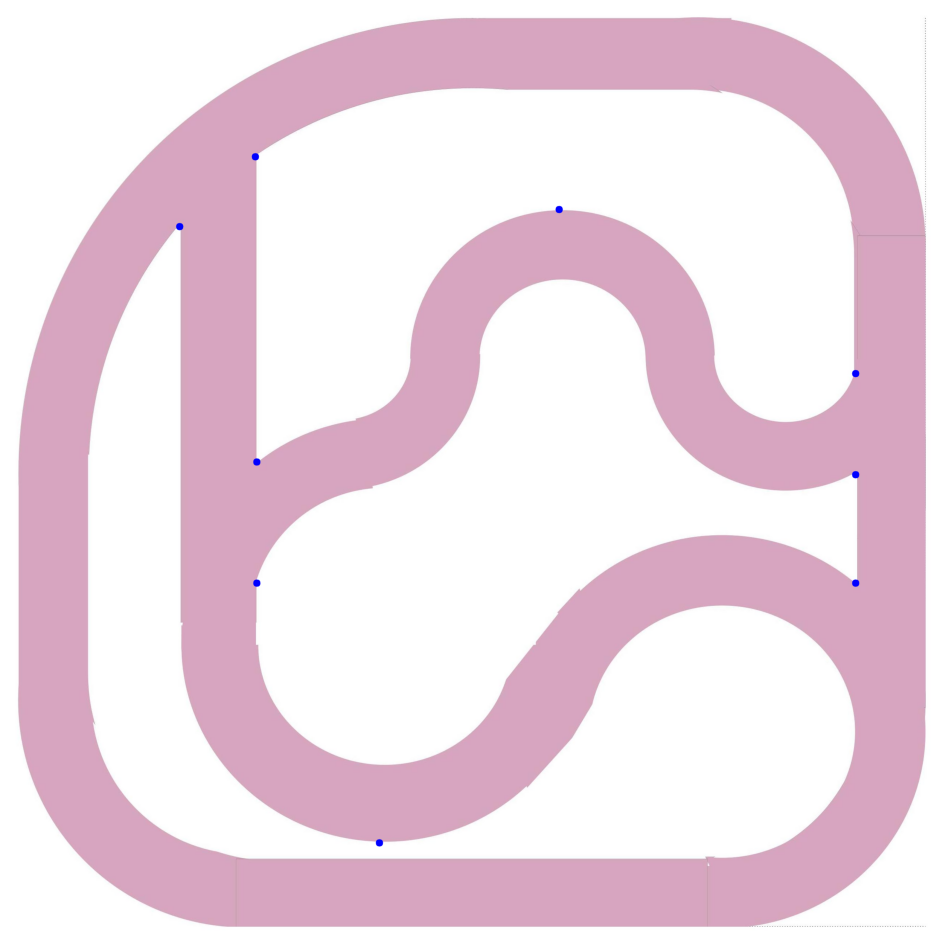

In [41]:
target_frame = Image.open(
    "/home/ali/bimi/DriveNetBench/assets/new_track/track-v2.jpg"
)
target_frame = ref_vertex_annoatator.annotate(target_frame, target_keypoints)
sv.plot_image(target_frame)

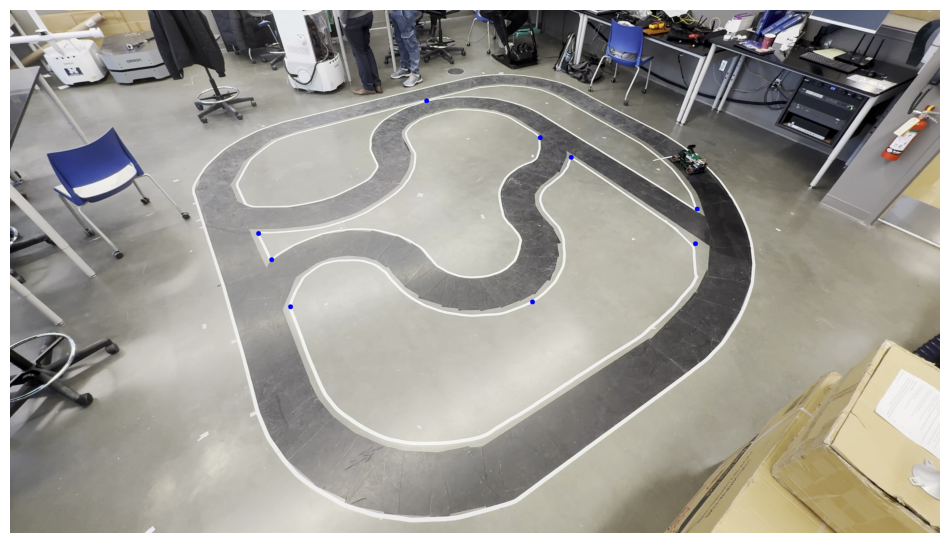

In [42]:
source_image = Image.open(
    "/home/ali/bimi/DriveNetBench/assets/new_track/base.jpg"
)
source_image = ref_vertex_annoatator.annotate(source_image, source_keypoints)
sv.plot_image(source_image)

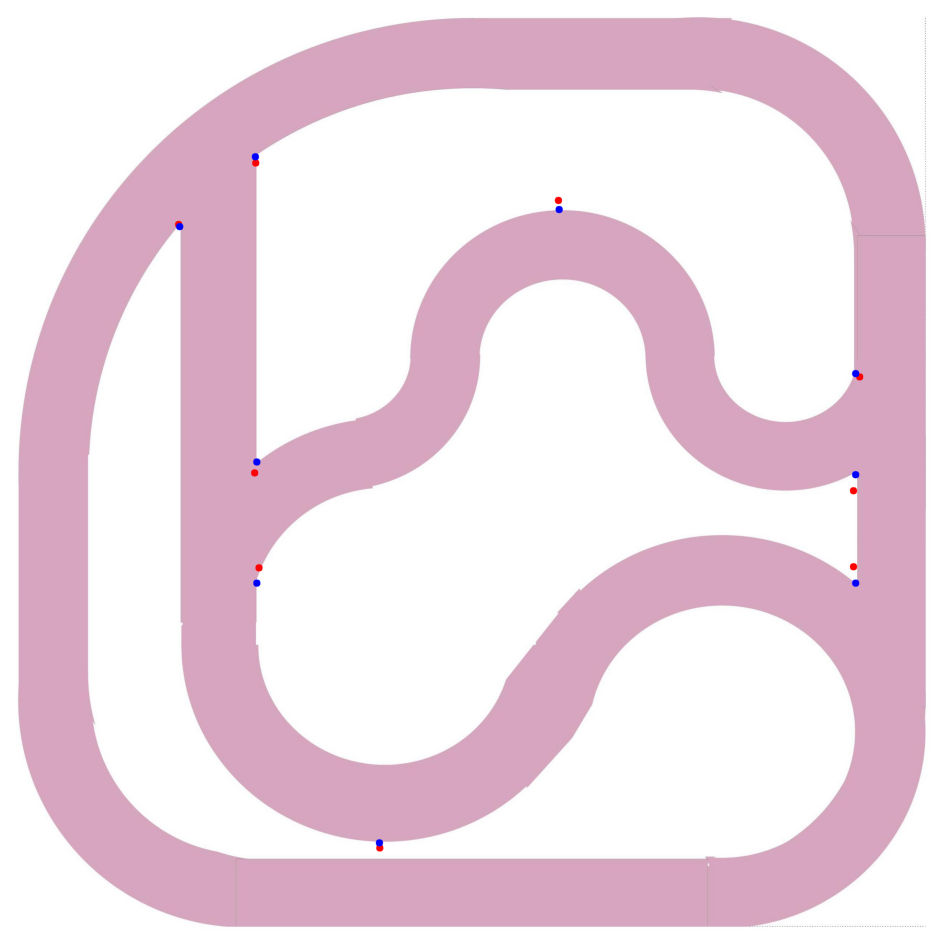

In [43]:
view_transformer = ViewTransformer(
    source=source_keypoints, target=target_keypoints
)

image = Image.open(
    "/home/ali/bimi/DriveNetBench/assets/new_track/track-v2.jpg"
)
annotated_image = image.copy()

transformed_keypoints = view_transformer.transform_points(
    original_source_keypoints
)
transformed_keypoints = transformed_keypoints[np.newaxis, ...]
transformed_keypoints = sv.KeyPoints(transformed_keypoints)
annotated_image = transformed_vertex_annotator.annotate(
    annotated_image, transformed_keypoints
)
annotated_image = ref_vertex_annoatator.annotate(
    annotated_image, target_keypoints
)
sv.plot_image(annotated_image)

In [44]:
org_source_keypoints = np.load(
    "/home/ali/bimi/DriveNetBench/keypoints/new_track/keypoints_from_camera.npy"
)
org_target_keypoints = np.load(
    "/home/ali/bimi/DriveNetBench/keypoints/new_track/keypoints_from_diagram.npy"
)

avg_errors = []
accumulated_errors = []

TOTAL_POINTS = 12
for i in range(4, TOTAL_POINTS + 1):
    source_keypoints = org_source_keypoints[:i, ...]
    target_keypoints = org_target_keypoints[:i, ...]

    source_keypoints = source_keypoints[np.newaxis, ...]
    target_keypoints = target_keypoints[np.newaxis, ...]

    source_keypoints = sv.KeyPoints(source_keypoints)
    target_keypoints = sv.KeyPoints(target_keypoints)

    view_transformer = ViewTransformer(
        source=source_keypoints, target=target_keypoints
    )

    transformed_keypoints = view_transformer.transform_points(
        original_source_keypoints
    )
    transformed_keypoints = transformed_keypoints[np.newaxis, ...]
    transformed_keypoints = sv.KeyPoints(transformed_keypoints)

    avg_error, accumulated_error = (
        view_transformer.calculate_transformation_error(
            source=org_source_keypoints,
            target=org_target_keypoints,
        )
    )
    avg_errors.append(avg_error)
    accumulated_errors.append(accumulated_error)



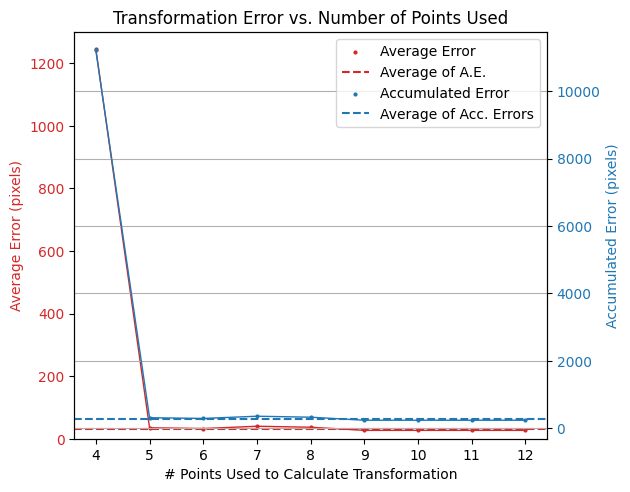

In [45]:
RANGE = range(4, TOTAL_POINTS + 1)
POINT_SIZE = 4
LINE_WIDTH = 1
fig, ax1 = plt.subplots()
color = "tab:red"
ax1.set_ylim(0, 1300)
ax1.set_xlabel("# Points Used to Calculate Transformation")
ax1.set_ylabel("Average Error (pixels)", color=color)
ax1.scatter(
    RANGE,
    avg_errors,
    label="Average Error",
    color=color,
    s=POINT_SIZE,
)
ax1.plot(
    RANGE,
    avg_errors,
    color=color,
    linewidth=LINE_WIDTH,
)

ax1.axhline(
    y=np.mean(avg_errors[1:]),
    color=color,
    linestyle="--",
    label="Average of A.E.",
)
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()

color = "tab:blue"
ax2.set_ylabel("Accumulated Error (pixels)", color=color)
ax2.scatter(
    RANGE,
    accumulated_errors,
    label="Accumulated Error",
    color=color,
    s=POINT_SIZE
)
ax2.plot(
    RANGE,
    accumulated_errors,
    color=color,
    linewidth=LINE_WIDTH,
)
ax2.tick_params(axis="y", labelcolor=color)
ax2.axhline(
    y=np.mean(accumulated_errors[1:]),
    color=color,
    linestyle="--",
    label="Average of Acc. Errors",
)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()


fig.tight_layout()
plt.title("Transformation Error vs. Number of Points Used")
plt.grid()
plt.legend(lines1 + lines2, labels1 + labels2)
plt.show()
